In [1]:
import os
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import utils as ut

In [2]:
meta_file = "/data5/deepro/starrseq/data/meta_data/metadata.json"
peak_dir = "/data5/deepro/starrseq/main_library/3_peak_call/data"
lib_name = "control"

In [3]:
lib_args = ut.create_args(meta_file, lib_name)

In [4]:
peakcall_methods = ["starrpeaker", "cradle", "macs2"]
peak_files = [ut.get_peak_file(peak_dir, lib_args.library_short, m) for m in peakcall_methods]

In [8]:
def store_cradle_activated_peaks(cradle_peak_file):
    cradle_peak_activated_file = cradle_peak_file + "_activated.bed"
    df = pd.read_csv(cradle_peak_file, sep="\t")
    df =  df.loc[df.effectSize>0]
    df =  df.iloc[:, 0:6]
    df.to_csv(cradle_peak_activated_file, sep="\t",  header=False, index=False)
    return cradle_peak_activated_file


In [9]:
new_cradle_file = store_cradle_activated_peaks(peak_files[1])
peak_files[1] = new_cradle_file

In [10]:
peak_beds = list(map(ut.read_bed, peak_files))

In [12]:
subset_dict = dict()

subset_dict["100"] = len(peak_beds[0] - peak_beds[1] - peak_beds[2])
subset_dict["010"] = len(peak_beds[1] - peak_beds[0] - peak_beds[2])
subset_dict["001"] = len(peak_beds[2] - peak_beds[0] - peak_beds[1])
subset_dict["110"] = len(peak_beds[0] + peak_beds[1] - peak_beds[2])
subset_dict["011"] = len(peak_beds[1] + peak_beds[1] - peak_beds[0])
subset_dict["101"] = len(peak_beds[0] + peak_beds[2] - peak_beds[1])
subset_dict["111"] = len(peak_beds[0] + peak_beds[1] + peak_beds[2])

In [20]:
import venn

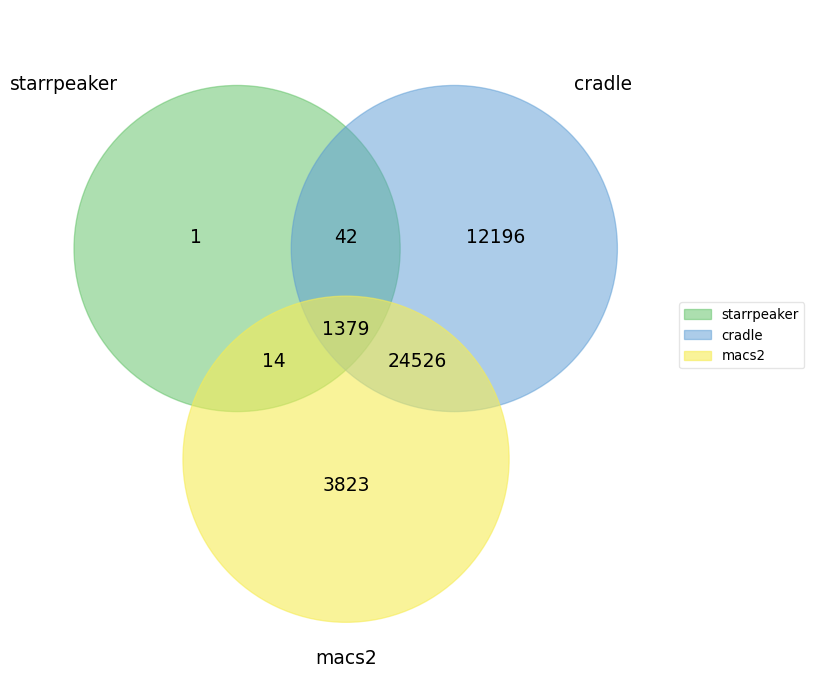

In [21]:
fig, ax = venn.venn3(subset_dict, names=peakcall_methods)
fig.show()

In [18]:
import pybedtools
pybedtools.helpers.cleanup(remove_all=True)